<a href="https://colab.research.google.com/github/msr35/DataStorytelling/blob/main/Zombie_Population_Predictive_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Futures

#### *"It's easy to confuse 'what is' with 'what ought to be,' especially when 'what is' has worked out in your favor."* - Tyrion Lannister, Game of Thrones

In scientific contexts data is how we describe the world. It is the result of experiments or the measuring naturally occuring phenomena. The same is true in epidemiology (think COVID-19 policy), commerce (sales forecasts), finance (investing), marketing (pricing), and weather forecasting, for example. Data tell us how the world *is*. But, on its own, it tell us nothing about how the world *ought* to be, or, that is, how it will be the future.

However, with the right tools we can use data to extrapolate from the current state of affairs to make predictions about future scenarios. We call this *mathematical modelling*. Let's start with a simple example, exponential growth.

##  A Zombie Population Story

Imagine a city in a zombie movie. At first, there are only a few zombies wandering the streets. Plenty of humans are available to infect, so the zombie population grows quickly. Each new zombie can infect more humans, leading to rapid spread. Let's try to model this simple scenario, and later on we'll add some modifications.

the-walking-dead-group-of-zombies.avif

# Simple Exponential Model

We can model this with a very simple equation. Let $x_t$ be the number of zombies on day $t$. Then the number of zombies on the next day $t+1$:

$$
x_{t+1} = r \, x_t
$$

Here, $r$ is the **growth rate**:
- If $r > 1$, each zombie creates more than one new zombie (on average), so the outbreak grows.
- If $r = 1$, the population stays constant.
- If $r < 1$, zombies are being eliminated, so the population shrinks.

Let's see what happens when we simulate this over multiple days $n$.

In [ ]:
import numpy as np # numpy for handling numbers
import matplotlib.pyplot as plt # for plotting

In [ ]:
def zombies(x0, r, n_steps):

  # x0 is the number of zombies on day 1, r is the growth rate, and n_steps is the number of days

    x = np.zeros(n_steps)
    x[0] = x0

    for t in range(n_steps - 1):
        x[t+1] = r * x[t]

    return x

Let's see what our function does:

In [ ]:
# Parameters
x0 = 10          # initial number of zombies
r = 1.1          # growth rate
n_steps = 30     # number of days to simulate

# Run simulation
population = zombies(x0, r, n_steps)

# Display first few values
print("Day 0:", population[0])
print("Day 1:", population[1])
print("Day 2:", population[2])
print("Day 7:", population[7])
print("Day 14:", population[14])

Day 0: 10.0
Day 1: 11.0
Day 2: 12.100000000000001
Day 7: 19.487171000000007
Day 14: 37.97498335832414


# Model Solution

*"Compound interest is the eighth wonder of the world. [S]he who understands it, earns it. [S]he who doesn't, pays it"* - Albert Einstein

Like compound interest, the population grows quickly. Very quickly. After 7 days it has almost doubled. After 14 it has almost doubled again. The patterns of how it grows will become clearer if we visualize the results:

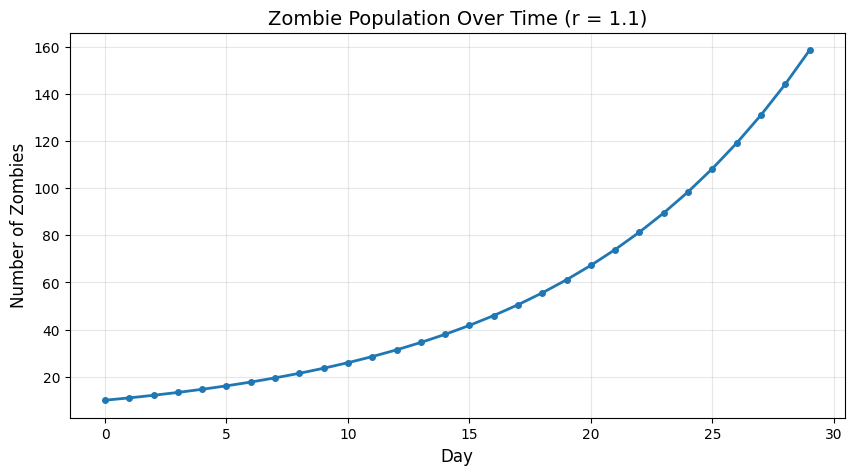

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(population, marker='o', linewidth=2, markersize=4)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Zombies', fontsize=12)
plt.title(f'Zombie Population Over Time (r = {r})', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

This growth pattern is known as "exponential growth". It occurs when the rate of growth is proportional the thing that's growing.

(For those of you that have studied calculus, the equation above is equivalent to the ordinary differential equation $dx/dt = x k$ with a solution of the form $x(t) = x_0 e^{kt}$, where $k \simeq 1 + r$. For those of you that don't know calculus, don't worry.)

Now you have a go. Try comparing multiple growth rates. Remember, when $r>1$, the zombies are infecting more zombies, and when $r<1$ they are dying out.

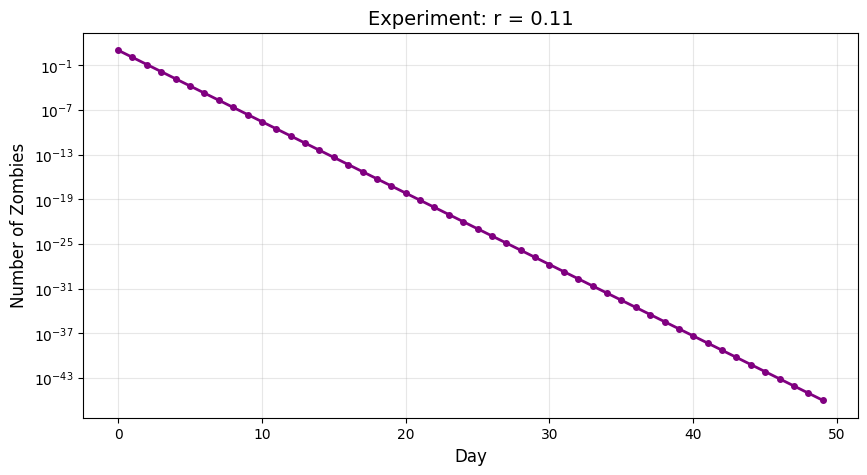

In [ ]:
x0 =  # Try changing this!
r =   # Try changing this!
n_steps = # Try changing this!

population = zombies(x0, r, n_steps)

plt.figure(figsize=(10, 5))
plt.plot(population, marker='o', linewidth=2, markersize=4, color='purple')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Zombies', fontsize=12)
plt.yscale('log')
plt.title(f'Experiment: r = {r}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

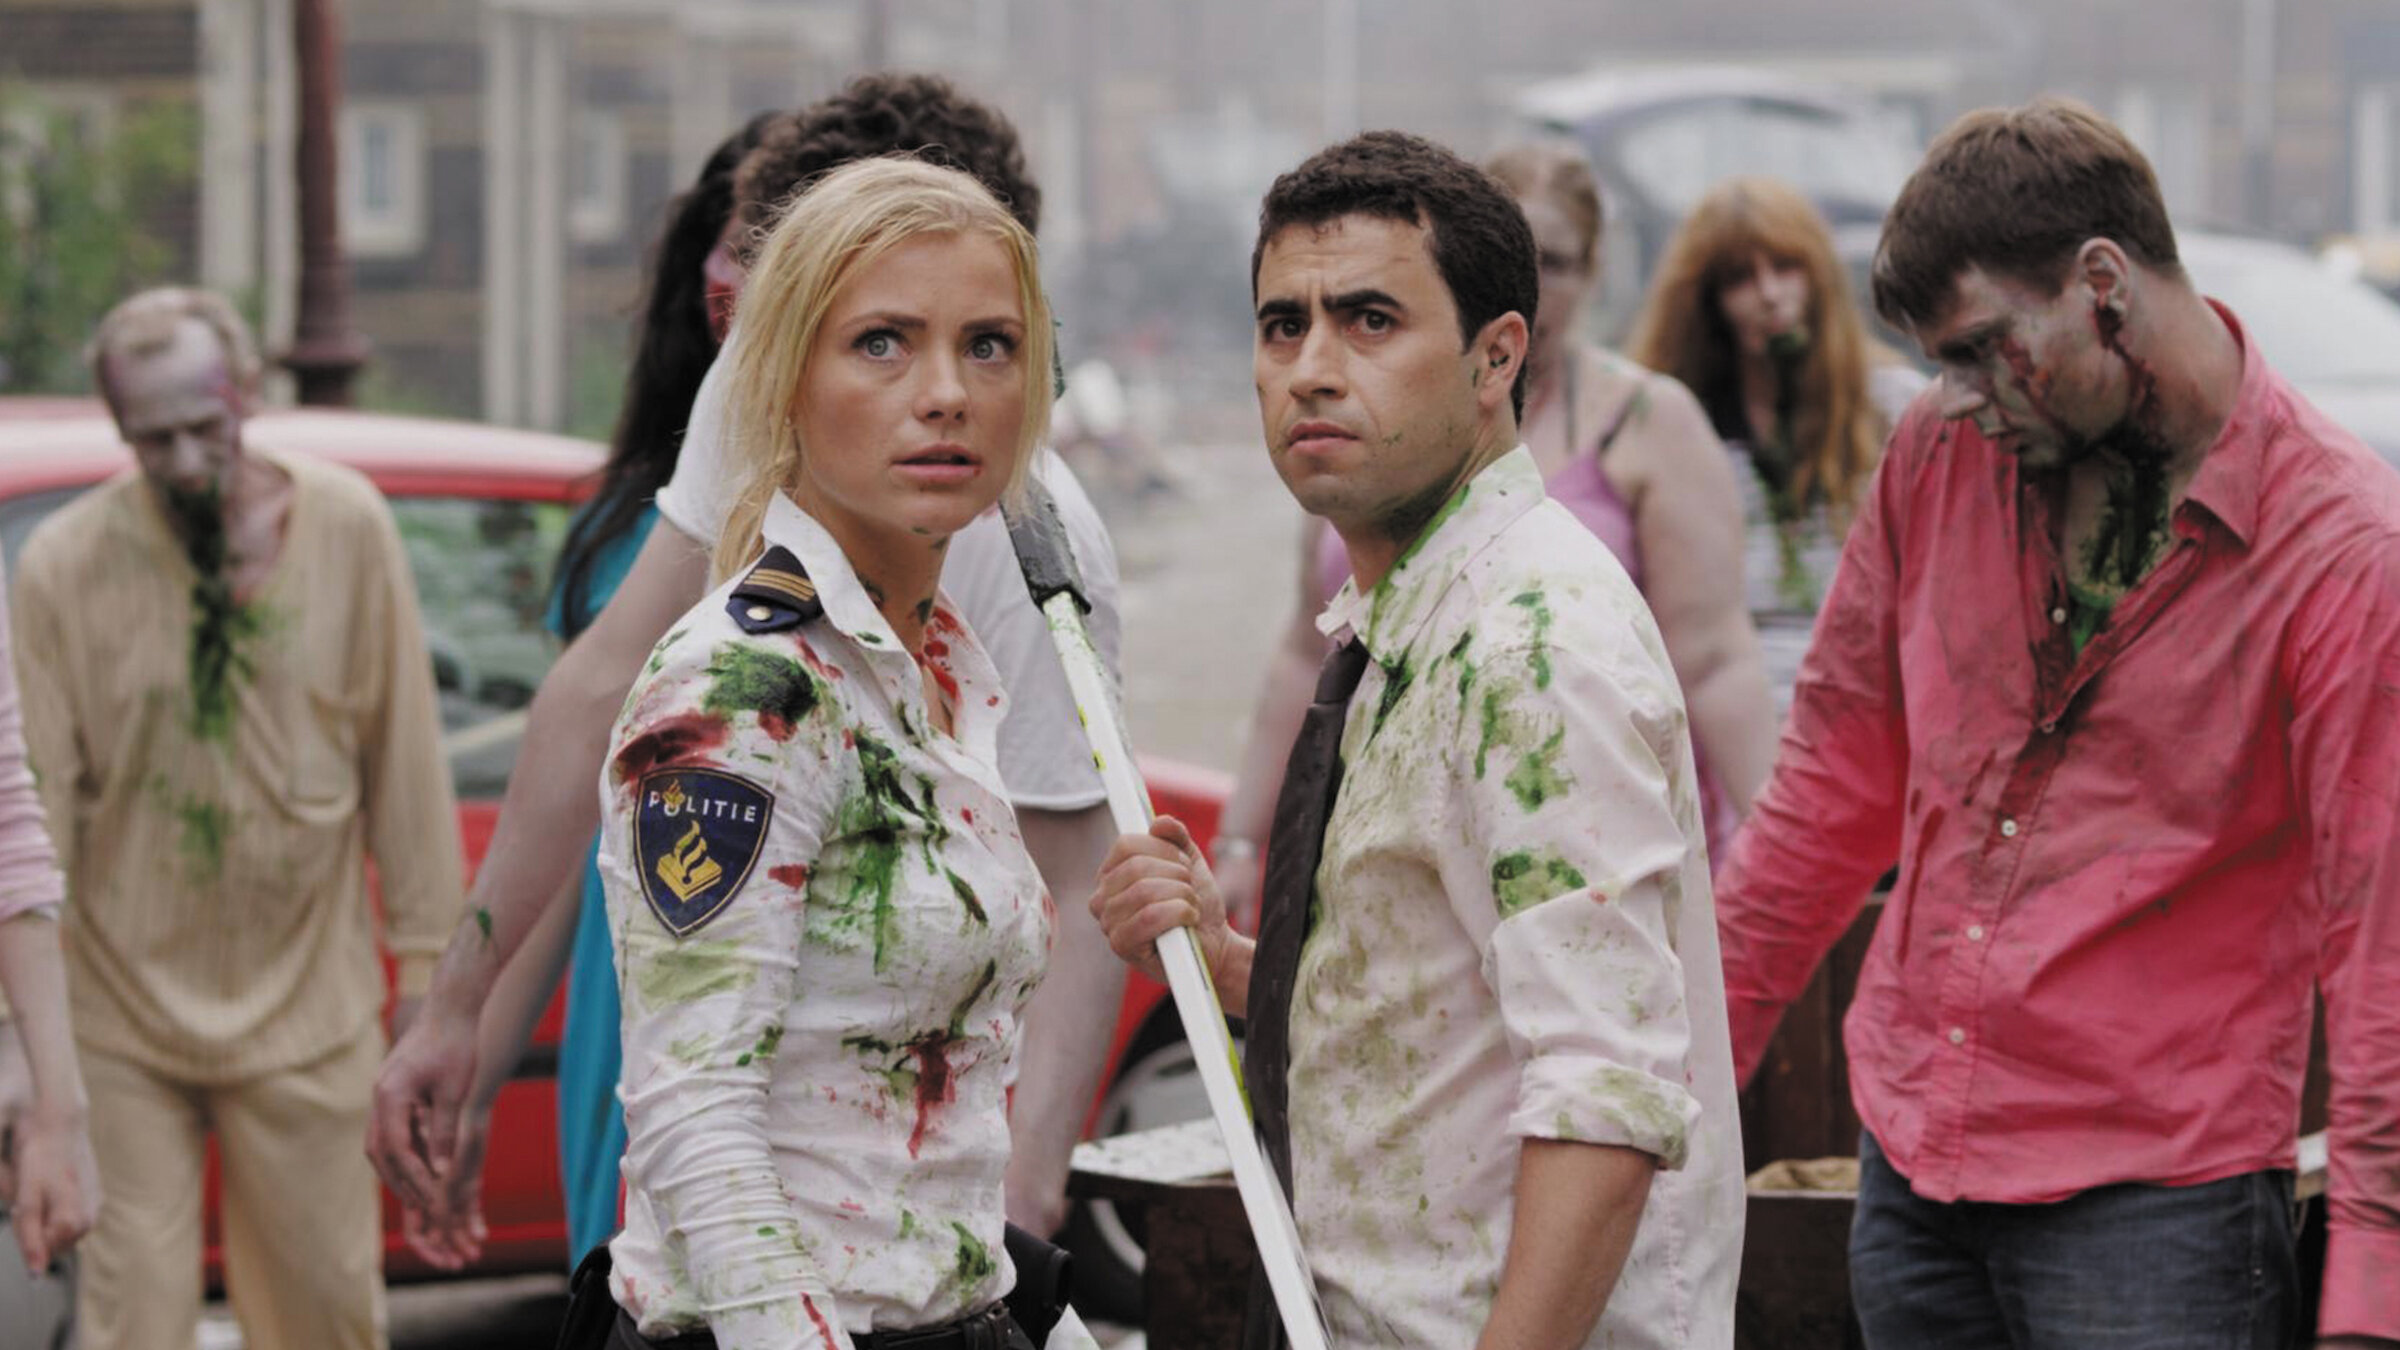

# More complex model

What if we modify our model to allow for the addition, or removal, of zombies from sources other than infection. For example, zombies arriving from other locations or their elimination by humans. Let the daily change (either positive or negative) in the number of zombies each day be $c$. The governing equation is now:

$$
x_{t+1} = r \, x_t + c
$$

where $c$ can be either positive or negative.

In [ ]:
def zombies2(x0, r, c, n_steps):

    x = np.zeros(n_steps)
    x[0] = x0

    for t in range(n_steps - 1):
        x[t+1] = r * x[t] + c

        if x[t+1] < 0: # to deal with negative numbers
          x[t+1] = 0

    return x

Again, let's see what happens.

In [ ]:
# Parameters
x0 = 20         # initial number of zombies
r = 1.2         # growth rate
n_steps = 50     # number of days to simulate
c = -3            # number of zombies that arrive/leave each day

# Run simulation
population = zombies2(x0, r, c, n_steps)

# Display first few values
print("Day 0:", population[0])
print("Day 1:", population[1])
print("Day 2:", population[2])
print("Day 7:", population[7])
print("Day 14:", population[14])

Day 0: 20.0
Day 1: 21.0
Day 2: 22.2
Day 7: 32.91590399999998
Day 14: 79.19592322744312


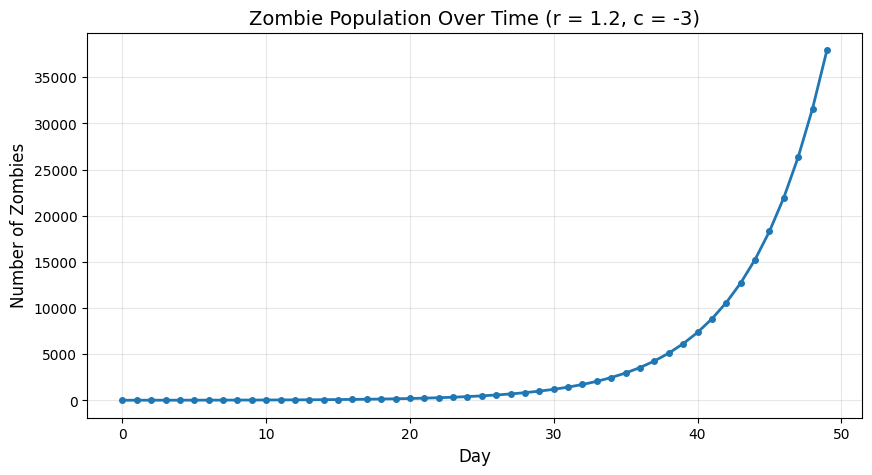

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(population, marker='o', linewidth=2, markersize=4)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Zombies', fontsize=12)
plt.title(f'Zombie Population Over Time (r = {r}, c = {c})', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

Even through this model is more complicated, the answer still looks like it's either exponential growth or exponential decay. However, unlike the simple model above, it *can* also reach an equilibrium where the number of zombies eventually stabalizes.

Spend a couple of minutes playing around with the code above to see if you can find this behaviour.

# Monte Carlo simulation

In [ ]:
def final_population_stability(x0, r, c, n_steps):
    """
    Returns the coefficient of variation of the last 20% of the simulation.
    Low values indicate equilibrium.
    """
    population = zombies2(x0, r, c, n_steps)
    last_portion = population[int(0.8 * n_steps):]
    mean_final = np.mean(last_portion)

    if mean_final > 1:
        std_final = np.std(last_portion)
        return std_final / mean_final  # coefficient of variation
    return 1.0  # high value indicates no equilibrium


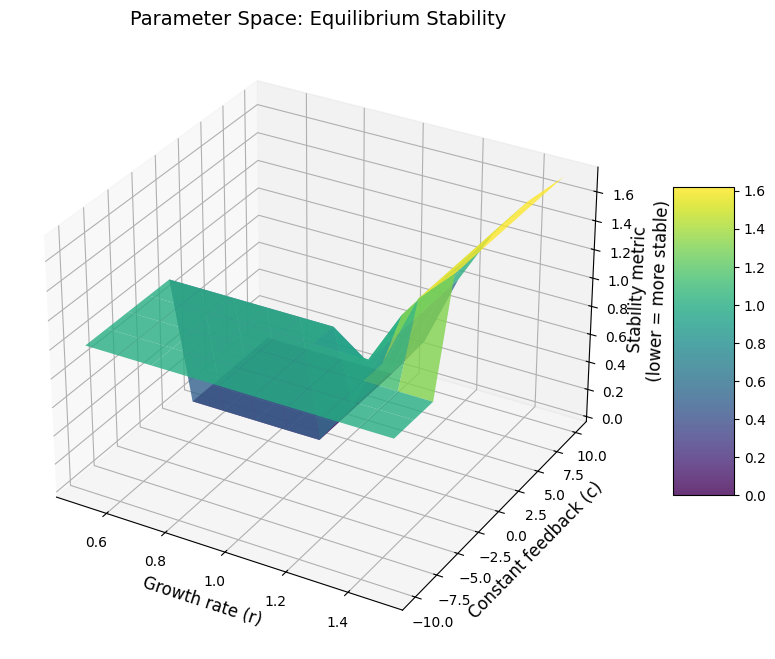

Regions with low stability metric (< 0.05) indicate equilibrium
Minimum stability: 0.0000
Maximum stability: 1.7327


In [ ]:
# Parameters
x0 = 10
n_steps = 100

# Create grid of r and c values
r_values = np.linspace(0.5, 1.5, 10)
c_values = np.linspace(-10, 10, 10)

# Create meshgrid for 3D plotting
R, C = np.meshgrid(r_values, c_values)

# Calculate stability metric for each (r, c) combination
Z = np.zeros_like(R)

for i in range(len(c_values)):
    for j in range(len(r_values)):
        Z[i, j] = final_population_stability(x0, R[i, j], C[i, j], n_steps)

# Create 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(R, C, Z, cmap='viridis', alpha=0.8)

ax.set_xlabel('Growth rate (r)', fontsize=12)
ax.set_ylabel('Constant feedback (c)', fontsize=12)
ax.set_zlabel('Stability metric\n(lower = more stable)', fontsize=12)
ax.set_title('Parameter Space: Equilibrium Stability', fontsize=14)

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Print some insights
print("Regions with low stability metric (< 0.05) indicate equilibrium")
print(f"Minimum stability: {Z.min():.4f}")
print(f"Maximum stability: {Z.max():.4f}")

/tmp/ipython-input-4201985380.py:18: UserWarning: Attempt to set non-positive zlim on a log-scaled axis will be ignored.
  ax.set_zscale('log')


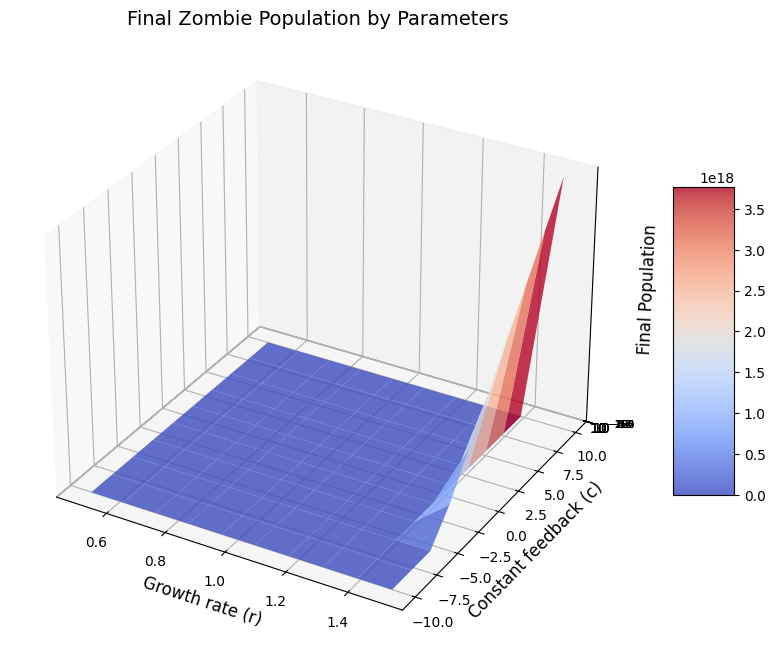

In [ ]:
# Calculate final population for each (r, c) combination
Z_pop = np.zeros_like(R)

for i in range(len(c_values)):
    for j in range(len(r_values)):
        population = zombies2(x0, R[i, j], C[i, j], n_steps)
        Z_pop[i, j] = population[-1]

# Create 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(R, C, Z_pop, cmap='coolwarm', alpha=0.8)

ax.set_xlabel('Growth rate (r)', fontsize=12)
ax.set_ylabel('Constant feedback (c)', fontsize=12)
ax.set_zlabel('Final Population', fontsize=12)
ax.set_zscale('log')
ax.set_title('Final Zombie Population by Parameters', fontsize=14)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

We will describe the zombie population using the discrete-time logistic equation. If $x_t$ is the number of zombies on day $t$, then the population on the next day, $x_{t+1}$, is given by

$$
x_{t+1} = x_t + r\,x_t\left(1 - \frac{x_t}{K}\right).
$$

You can think of each time step $t$ as one day in the outbreak.

The quantity $x_t$ represents the number of zombies on day $t$, while $x_{t+1}$ represents the number on the following day. The parameter $r$ is the growth rate, which measures how quickly zombies are created when humans are plentiful. A larger value of $r$ means that each zombie is more effective at infecting others. The parameter $K$ is the carrying capacity of the city. It represents the maximum number of zombies the city can support, limited by the total population, available space, and resources.


In [ ]:
@interact(r=(0.5, 2.0, 0.1), n=(10, 100, 5))
def plot_zombie_outbreak(r=1.1, n=50):
    """Interactive plot with sliders for r and n."""
    x0 = 10  # initial zombies
    population = zombies(x0, r, n)

    plt.figure(figsize=(10, 5))
    plt.plot(population, marker='o', linewidth=2, markersize=4)
    plt.xlabel('Day', fontsize=12)
    plt.ylabel('Number of Zombies', fontsize=12)
    plt.yscale('log')
    plt.title(f'Zombie Population (r={r}, days={n})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

interactive(children=(FloatSlider(value=1.1, description='r', max=2.0, min=0.5), IntSlider(value=50, descripti…